In [142]:
!pip install mlxtend
!pip install prophet
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [143]:
happiness = pd.read_csv("Resources/WHR 2005 to 2023 Utopia 1.csv")
# happiness = pd.read_csv("Resources/WHR 2005 to 2023 No Crash.csv")
# happiness = pd.read_csv("Resources/WHR 2005 to 2023 No Pandemic.csv")
# happiness = pd.read_csv("Resources/WHR 2005 to 2023 Utopia.csv")
happiness_total = pd.read_csv("Resources/WHR 2005 to 2023 Utopia 1.csv")
happiness_ref = pd.read_csv("Resources/2019_global_happiness_reference.csv")
happiness.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [144]:
# Define the years to be dropped and the years for which averages will be calculated
years_to_drop = [2008, 2009, 2020, 2021]
averaging_years = [(2008, [2006, 2007]), (2009, [2010, 2011]), (2020, [2018, 2019]), (2021, [2022, 2023])]

# Drop the data for the specified years
happiness_filtered = happiness[~happiness['Year'].isin(years_to_drop)]

# Calculate averages and replace missing years with the averages
for year_to_replace, averaging_pair in averaging_years:
    average_data = happiness_filtered[happiness_filtered['Year'].isin(averaging_pair)]['Life Ladder'].mean()
    happiness_filtered.loc[happiness_filtered['Year'] == year_to_replace, 'Life Ladder'] = average_data

In [145]:
# happiness_total.info()
happiness_filtered.info()
happiness_filtered.head

<class 'pandas.core.frame.DataFrame'>
Index: 1874 entries, 2 to 2335
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Name                       1874 non-null   object 
 1   Regional Indicator                 1874 non-null   object 
 2   Year                               1874 non-null   int64  
 3   Life Ladder                        1874 non-null   float64
 4   Log GDP Per Capita                 1859 non-null   float64
 5   Social Support                     1862 non-null   float64
 6   Healthy Life Expectancy At Birth   1830 non-null   float64
 7   Freedom To Make Life Choices       1848 non-null   float64
 8   Generosity                         1807 non-null   float64
 9   Perceptions Of Corruption          1773 non-null   float64
 10  Positive Affect                    1716 non-null   float64
 11  Negative Affect                    1723 non-null   float64
 1

<bound method NDFrame.head of      Country Name  Regional Indicator  Year  Life Ladder  Log GDP Per Capita  \
2     Afghanistan          South Asia  2010     4.758381            7.613900   
3     Afghanistan          South Asia  2011     3.831719            7.581259   
4     Afghanistan          South Asia  2012     3.782938            7.660506   
5     Afghanistan          South Asia  2013     3.572100            7.680333   
6     Afghanistan          South Asia  2014     3.130896            7.670638   
...           ...                 ...   ...          ...                 ...   
2329     Zimbabwe  Sub-Saharan Africa  2017     3.638300            7.754387   
2330     Zimbabwe  Sub-Saharan Africa  2018     3.616480            7.783066   
2331     Zimbabwe  Sub-Saharan Africa  2019     2.693523            7.697755   
2334     Zimbabwe  Sub-Saharan Africa  2022     3.296220            7.670123   
2335     Zimbabwe  Sub-Saharan Africa  2023     3.204000            7.641000   

      Soc

In [146]:
# print("Mean Squared Error:", mse)
# print("R^2 Score:", r2)

In [147]:
happiness_filtered.shape

(1874, 13)

In [148]:
happiness_filtered.dtypes

Country Name                          object
Regional Indicator                    object
Year                                   int64
Life Ladder                          float64
Log GDP Per Capita                   float64
Social Support                       float64
Healthy Life Expectancy At Birth     float64
Freedom To Make Life Choices         float64
Generosity                           float64
Perceptions Of Corruption            float64
Positive Affect                      float64
Negative Affect                      float64
Confidence In National Government    float64
dtype: object

In [149]:
happiness_filtered.isnull().sum()

Country Name                           0
Regional Indicator                     0
Year                                   0
Life Ladder                            0
Log GDP Per Capita                    15
Social Support                        12
Healthy Life Expectancy At Birth      44
Freedom To Make Life Choices          26
Generosity                            67
Perceptions Of Corruption            101
Positive Affect                      158
Negative Affect                      151
Confidence In National Government    440
dtype: int64

In [150]:
# sns.pairplot(happiness_filtered)

In [151]:
happiness_ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Variable     11 non-null     object
 1   Description  11 non-null     object
dtypes: object(2)
memory usage: 304.0+ bytes


In [152]:
# happiness_ref.head(20)

In [153]:
cols_to_plot = ['']

In [154]:
# print("Mean Squared Error:", mse)
# print("R^2 Score:", r2)

In [155]:
happiness_total.head(50)

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440
5,Afghanistan,South Asia,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328,0.482847
6,Afghanistan,South Asia,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861,0.409048
7,Afghanistan,South Asia,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.081652,0.880638,0.491410,0.339276,0.260557
8,Afghanistan,South Asia,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.043916,0.793246,0.501409,0.348332,0.324990
9,Afghanistan,South Asia,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.119410,0.954393,0.435270,0.371326,0.261179


In [156]:
# imputer = SimpleImputer(strategy='mean')
# imputer.fit(happiness.select_dtypes(include=np.number))

# imputer = SimpleImputer(strategy='mean')
# X_imputed = imputer.fit_transform(X)

In [157]:
# happiness_imputed = pd.DataFrame(imputer.transform(happiness.select_dtypes(include=np.number)), columns=happiness.select_dtypes(include=np.number).columns)

In [158]:
# categorical_cols = happiness.select_dtypes(exclude=np.number).columns
# happiness_imputed[categorical_cols] = happiness[categorical_cols]

In [159]:
# happiness_imputed.isnull().sum()

In [160]:
# happiness_imputed.to_csv("Resources/preprocessed_happiness_data.csv", index=False)

In [161]:
# X = happiness_imputed.drop(columns=['Life Ladder'])
# y = happiness_imputed['Life Ladder']

In [162]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [163]:
# print("X_train data types:")
# print(X_train.dtypes)
# print("\n")
# print("y_train data types:")
# print(y_train.dtypes)

In [164]:
# # Perform one-hot encoding on categorical variables
# happiness_encoded = pd.get_dummies(happiness_imputed, columns=['Country Name', 'Regional Indicator'])

In [165]:
# from sklearn.linear_model import LinearRegression

# # Define the model
# model = LinearRegression()

In [166]:
# # Encode categorical variables using one-hot encoding
# X_encoded = pd.get_dummies(X)

In [167]:
# # Split the encoded data into training and testing sets
# X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [168]:
# # Train the model
# model.fit(X_train_encoded, y_train)

In [169]:
# # Evaluate the model
# y_pred = model.predict(X_test_encoded)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("R^2 Score:", r2)

In [170]:
# # Train the model
# model.fit(X_train_encoded, y_train)

In [171]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LinearRegression

# # Define the grid of hyperparameters
# param_grid = {
#     'fit_intercept': [True, False]
# }

# # Initialize LinearRegression model
# model = LinearRegression()

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# # Fit the GridSearchCV object to the data
# grid_search.fit(X_train_encoded, y_train)

# # Get the best model
# best_model = grid_search.best_estimator_

# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

# # Evaluate the best model
# y_pred_best = best_model.predict(X_test_encoded)
# mse_best = mean_squared_error(y_test, y_pred_best)
# r2_best = r2_score(y_test, y_pred_best)

# print("Mean Squared Error (Best Model):", mse_best)
# print("R^2 Score (Best Model):", r2_best)

In [172]:
from prophet import Prophet

# Create a Prophet model
prophet_model = Prophet()

In [173]:
model = Prophet()

In [174]:
print(happiness_filtered.head())
print(happiness_filtered.dtypes)

  Country Name Regional Indicator  Year  Life Ladder  Log GDP Per Capita  \
2  Afghanistan         South Asia  2010     4.758381            7.613900   
3  Afghanistan         South Asia  2011     3.831719            7.581259   
4  Afghanistan         South Asia  2012     3.782938            7.660506   
5  Afghanistan         South Asia  2013     3.572100            7.680333   
6  Afghanistan         South Asia  2014     3.130896            7.670638   

   Social Support  Healthy Life Expectancy At Birth  \
2        0.539075                         51.099998   
3        0.521104                         51.400002   
4        0.520637                         51.700001   
5        0.483552                         52.000000   
6        0.525568                         52.299999   

   Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
2                      0.600127    0.121316                   0.706766   
3                      0.495901    0.163571                   0.

In [175]:
# Convert 'Year' column to datetime format and rename it to 'ds'
happiness_filtered['ds'] = pd.to_datetime(happiness_filtered['Year'], format='%Y')

# Select a column containing the target variable and rename it to 'y'
happiness_filtered.rename(columns={'Life Ladder': 'y'}, inplace=True)

# Check the first few rows and data types again to verify the changes
print(happiness_filtered.head())
print(happiness_filtered.dtypes)

  Country Name Regional Indicator  Year         y  Log GDP Per Capita  \
2  Afghanistan         South Asia  2010  4.758381            7.613900   
3  Afghanistan         South Asia  2011  3.831719            7.581259   
4  Afghanistan         South Asia  2012  3.782938            7.660506   
5  Afghanistan         South Asia  2013  3.572100            7.680333   
6  Afghanistan         South Asia  2014  3.130896            7.670638   

   Social Support  Healthy Life Expectancy At Birth  \
2        0.539075                         51.099998   
3        0.521104                         51.400002   
4        0.520637                         51.700001   
5        0.483552                         52.000000   
6        0.525568                         52.299999   

   Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
2                      0.600127    0.121316                   0.706766   
3                      0.495901    0.163571                   0.731109   
4       

C:\Users\Sean\AppData\Local\Temp\ipykernel_756\1838904714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happiness_filtered['ds'] = pd.to_datetime(happiness_filtered['Year'], format='%Y')
C:\Users\Sean\AppData\Local\Temp\ipykernel_756\1838904714.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happiness_filtered.rename(columns={'Life Ladder': 'y'}, inplace=True)


In [176]:
# # Rename the datetime column to 'ds'
# df_test.rename(columns={'Year': 'ds'}, inplace=True)

# # Evaluate the model on the test data
# y_pred_test = model.predict(X_test_encoded)
# mse_test = mean_squared_error(y_test, y_pred_test)
# r2_test = r2_score(y_test, y_pred_test)
# print("Test Mean Squared Error:", mse_test)
# print("Test R^2 Score:", r2_test)

In [177]:
# # Rename the datetime column to 'ds'
# df_test.rename(columns={'date': 'ds'}, inplace=True)

# # Evaluate the model on the training data
# y_pred_train = model.predict(X_train_encoded)
# mse_train = mean_squared_error(y_train, y_pred_train)
# r2_train = r2_score(y_train, y_pred_train)
# print("Training Mean Squared Error:", mse_train)
# print("Training R^2 Score:", r2_train)

# # Evaluate the model on the training data
# y_pred_train = model.predict(X_train_encoded)
# mse_train = mean_squared_error(y_train, y_pred_train)
# r2_train = r2_score(y_train, y_pred_train)
# print("Training Mean Squared Error:", mse_train)
# print("Training R^2 Score:", r2_train)

In [178]:
# Fit the Prophet model to the data
model.fit(happiness_filtered)

15:22:25 - cmdstanpy - INFO - Chain [1] start processing
15:22:25 - cmdstanpy - INFO - Chain [1] done processing


In [179]:
# Create a DataFrame for the next X years
future_dates = model.make_future_dataframe(periods=30, freq='Y')

In [180]:
# Make predictions for the future dates
forecast = model.predict(future_dates)

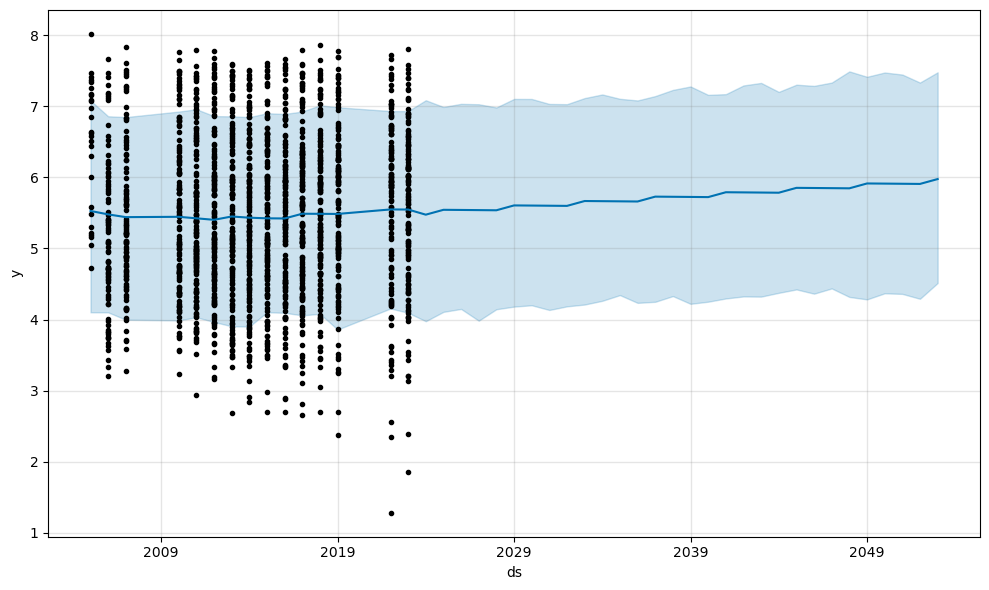

In [181]:
# Plot the forecast
fig = model.plot(forecast)

In [182]:
# import matplotlib.pyplot as plt
# from mlxtend.plotting import plot_decision_regions
# from sklearn.datasets import make_classification
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier

# # Generate synthetic dataset
# X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
#                            random_state=1, n_clusters_per_class=1)

# # Define classifiers
# rf_clf = RandomForestClassifier(n_estimators=100, random_state=1)
# knn_clf = KNeighborsClassifier(n_neighbors=3)

# # Fit classifiers
# rf_clf.fit(X, y)
# knn_clf.fit(X, y)

# # Plot decision boundaries
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plot_decision_regions(X, y, clf=rf_clf, legend=2)
# plt.title('Decision Boundaries - Random Forest')

# plt.subplot(1, 2, 2)
# plot_decision_regions(X, y, clf=knn_clf, legend=2)
# plt.title('Decision Boundaries - k-Nearest Neighbors')

# plt.show()

In [183]:
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression

# # Define classifiers
# svm_clf = SVC(kernel='linear', C=1.0, random_state=1)
# lr_clf = LogisticRegression(random_state=1)

# # Fit classifiers
# svm_clf.fit(X, y)
# lr_clf.fit(X, y)

# # Plot decision boundaries
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plot_decision_regions(X, y, clf=svm_clf, legend=2)
# plt.title('Decision Boundaries - Support Vector Machine')

# plt.subplot(1, 2, 2)
# plot_decision_regions(X, y, clf=lr_clf, legend=2)
# plt.title('Decision Boundaries - Logistic Regression')

# plt.show()

In [184]:
# # Evaluate the model on the training data
# y_pred_train = model.predict(X_train_encoded)
# mse_train = mean_squared_error(y_train, y_pred_train)
# r2_train = r2_score(y_train, y_pred_train)
# print("Training Mean Squared Error:", mse_train)
# print("Training R^2 Score:", r2_train)

In [185]:
# print("Mean Squared Error (Best Model):", mse_best)
# print("R^2 Score (Best Model):", r2_best)

In [186]:
# # Evaluate the model
# y_pred = model.predict(X_test_encoded)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("R^2 Score:", r2)